#                                    Facial Keypoint Detection


### AIM is to detect following 15 different keypoints on the face.  
- left_eye_center
- right_eye_center
- left_eye_inner_corner 
- left_eye_outer_corner
- right_eye_inner_corner
- right_eye_outer_corner
- left_eyebrow_inner_end
- left_eyebrow_outer_end
- right_eyebrow_inner_end
- right_eyebrow_outer_end
- nose_tip
- mouth_left_corner
- mouth_right_corner
- mouth_center_top_lip
- mouth_center_bottom_lip

 

*Left* *and* *right* *here* *refers* *to* *the* *point* *of* *view* *of* *the* *subject*.

 




***Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices.***


**Data files**
- training.csv: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels. 
- test.csv: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels  

## 1. Importing the libraries


Importing Libraries :

- pandas : for handling dataframes. <br><br>

- numpy : for handling numpy objects.<br><br>


- matplotlib.pyplot : for visualising dataset.<br><br>


- train_test_split : for splitting training and testing datasets.<br><br>

- StandardScaler : for rescaling the dataset.<br><br>

- keras: to make model


In [2]:
# IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
import seaborn as sns
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout
from keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2

Using TensorFlow backend.


## 2. Importing the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# IMPORTING TRAINING DATASET AND REST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

## 3. Data Handling

### 3.1 Getting sense of the training data

In [0]:
# TO FIND THE SHAPE OF TRAINING DATASET
train_data.shape

(7049, 31)

OBSERVATION: Total 31 parameters and 7049 data points in the datset

In [0]:
#TO SHOW THE TOP 5 ROWS OF DATASET
train_data.head(5).T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [0]:
train_data.tail(5).T

,7044,7045,7046,7047,7048
left_eye_center_x,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_y,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_x,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_y,NaN,NaN,NaN,NaN,NaN


Observation: There are lotsof missing values in last 5 rows

In [0]:
# TO DESCRIBE THE DATASET IN TERMS OF COUNTS,MINIMUM AND MAXIMUM VALUE,STANDARD DEVIATION,MEAN OF EACH NUMERICAL PARAMETER
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,65.082895,66.497566,68.024752,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,35.900451,37.528055,39.258449,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,28.783339,30.251378,31.768334,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,36.327681,37.813273,39.566729,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,58.039339,59.304615,60.519810,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,36.626283,37.878040,39.260348,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,71.716503,73.247824,75.015645,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,36.085523,37.639015,39.373489,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,35.506126,36.651562,37.753571,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,36.766783,37.944075,39.192917,69.808803


In [0]:
# TO GET THE INFORMTION LIKE PRAMETERS TYPE AND NO. OF NON NULL VALUES IN EACH PARAMETER 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

OBSERVATION : One parameter is image and other all  parameters are numerical.
    All other parameter are giving information about the Face keypoints and helps in detecting face keypoints

In [0]:
#TO FIND TOTAL NO. OF MISSING VALUES IN EACH PARAMETER
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

OBSERVATION : Most paraeters have more than 50% missing values

In [0]:
# TO FIND PARAMETERS WHICH IS HAVING ANY MISSING VALUES
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

OBSERVATION:
    28 Columns have mising values while 3 columns ( Image, noise_tip_x, noise_tip_y) don't have missing values.Out of 7049 training
images, 7000 images (99%) had at least 4 keypoints identified (center of left eye, center of right
eye, nose tip, and center of bottom lip). Only 2140 images (30%) had all 15 keypoints identified. 

##### We can do two things to handle missing values 
##### - Remove the rows having missing values.
##### - Fill missing values with something. 

We have lots of missing data. 22 columns have more than 4770 missing values out of 7049. It means approx 50% data is missing.If we will try to fill the missing values. It may give error because avry face have different location of keypoint and so we will drop missing values and try to generate more images in later part of code. 

## 3.2 Handling missing values

### 3.2.1. If we will Drop non missing values

In [0]:
# DROPPING DATA POINS WHICH IS HAVING MISSING VALUES
train_data = train_data.dropna() 

In [0]:
train_data.tail(5).T

,2277,2278,2281,2282,2283
left_eye_center_x,67.1804,65.7245,68.4309,64.1522,66.6838
left_eye_center_y,35.8164,36.301,38.652,30.6916,34.4834
right_eye_center_x,33.24,25.3776,28.8959,27.0009,30.7845
right_eye_center_y,34.9219,37.3112,37.617,40.8681,38.5789
left_eye_inner_corner_x,59.348,58.5306,61.6594,56.5056,59.2553
left_eye_inner_corner_y,37.0009,37.7398,40.1009,34.127,36.0651
left_eye_outer_corner_x,72.6679,74.449,75.5868,73.4368,73.9427
left_eye_outer_corner_y,37.0976,37.5255,40.2192,28.5563,34.6247
right_eye_inner_corner_x,39.4043,33.551,37.6651,34.7461,37.4785
right_eye_inner_corner_y,36.5899,38.1071,39.0872,40.5069,39.398


In [0]:
# TO SEE THE SHAPE OF DATA AFTER DROPPING MISSING VALUES
train_data.shape

(2140, 31)

Now, We are having 2140 data points and 31 parameters

In [0]:
#TO CONVERT STRING OF NUMBERS INTO NUMPY ARRAY
train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [0]:
# TO SEE IMAGE COLUMN AFTER CONVERTIG INTO NUMPY ARRAYS
train_data.Image

0       [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1       [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2       [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3       [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4       [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
                              ...                        
2277    [191.0, 191.0, 191.0, 190.0, 189.0, 185.0, 184...
2278    [19.0, 19.0, 19.0, 18.0, 13.0, 7.0, 3.0, 4.0, ...
2281    [31.0, 40.0, 47.0, 31.0, 54.0, 58.0, 63.0, 100...
2282    [7.0, 1.0, 5.0, 1.0, 3.0, 20.0, 12.0, 0.0, 5.0...
2283    [68.0, 19.0, 19.0, 23.0, 19.0, 26.0, 23.0, 16....
Name: Image, Length: 2140, dtype: object

Image column was cnverted from string to numpy array

In [0]:
# TO CHECK THE DATA COUNT OF EACH PARAMETER OR COLUMN
train_data.count()

left_eye_center_x            2140
left_eye_center_y            2140
right_eye_center_x           2140
right_eye_center_y           2140
left_eye_inner_corner_x      2140
left_eye_inner_corner_y      2140
left_eye_outer_corner_x      2140
left_eye_outer_corner_y      2140
right_eye_inner_corner_x     2140
right_eye_inner_corner_y     2140
right_eye_outer_corner_x     2140
right_eye_outer_corner_y     2140
left_eyebrow_inner_end_x     2140
left_eyebrow_inner_end_y     2140
left_eyebrow_outer_end_x     2140
left_eyebrow_outer_end_y     2140
right_eyebrow_inner_end_x    2140
right_eyebrow_inner_end_y    2140
right_eyebrow_outer_end_x    2140
right_eyebrow_outer_end_y    2140
nose_tip_x                   2140
nose_tip_y                   2140
mouth_left_corner_x          2140
mouth_left_corner_y          2140
mouth_right_corner_x         2140
mouth_right_corner_y         2140
mouth_center_top_lip_x       2140
mouth_center_top_lip_y       2140
mouth_center_bottom_lip_x    2140
mouth_center_b

In [0]:
# TO CONVERT N-d ARRAYS INTO STACK OF N-d ARRAY
X = np.vstack(train_data['Image'].values) / 255.  # changes valeus between 0 and 1
X = X.astype(np.float32)

In [0]:
# TO GET DEPENDENT FEATURE AND INDEPENDENT FEATURES
y = train_data[train_data.columns[:-1]].values
y = (y - 48) / 48  # y values are between [-1,1]
X, y = shuffle(X, y, random_state=42)  # shuffle data
y = y.astype(np.float32)

In [0]:
# TO PRINT SHAPE , MINIMUM AND MAXIMUM VALUES OF DEPENDENT AND INDEPENDENT FEATURES
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


### 3.2.2 To increase no. of data points to train better model by Data Augmentation

***We will flip the pictures for Data Augmentation.***
 
We will use FlippedDataGenerator which is written by Shinya. This class extends the keras.preprocessing.image.imageDataGenerator and overwrites "next" method.  

Why are nor we using ImageDataGenerator?
Keras has exisiting ImageDataGenerator but this only flip the data and not the land marks. I guess ImageDataGenerator can be used for image classification purpose where the classification labels do not need to be flipped. (e.g., Dog picture is a dog picture even if the picutre is flipped.)

### 3.2.2.1 To generate images by flipping the images

In [ ]:
# function to modify the dataset
class DataModifier(object):
    def fit(self,X_,y_):
        return(NotImplementedError)
    
class FlipPic(DataModifier):
    def __init__(self,flip_indices=None):
        if flip_indices is None:
            flip_indices = [
                (0, 2), (1, 3),
                (4, 8), (5, 9), (6, 10), (7, 11),
                (12, 16), (13, 17), (14, 18), (15, 19),
                (22, 24), (23, 25)
                ]
        
        self.flip_indices = flip_indices
        
    def fit(self,X_batch,y_batch):

        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, int(batch_size/2), replace=False)

        X_batch[indices] = X_batch[indices, :, ::-1,:]
        y_batch[indices, ::2] = y_batch[indices, ::2] * -1

        # flip left eye to right eye, left mouth to right mouth and so on .. 
        for a, b in self.flip_indices:
            y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
        return X_batch, y_batch

### 3.2.2.2 To generate images by shifting the pixeels after flipping the images

In [ ]:
class ShiftFlipPic(FlipPic):
    def __init__(self,flip_indices=None,prop=0.1):
        super(ShiftFlipPic,self).__init__(flip_indices)
        self.prop = prop
        
    def fit(self,X,y):
        X, y = super(ShiftFlipPic,self).fit(X,y)
        X, y = self.shift_image(X,y,prop=self.prop)
        return(X,y)
    def random_shift(self,shift_range,n=96):
        '''
        :param shift_range: 
        The maximum number of columns/rows to shift
        :return: 
        keep(0):   minimum row/column index to keep
        keep(1):   maximum row/column index to keep
        assign(0): minimum row/column index to assign
        assign(1): maximum row/column index to assign
        shift:     amount to shift the landmark

        assign(1) - assign(0) == keep(1) - keep(0)
        '''
        shift = np.random.randint(-shift_range,
                                  shift_range)
        def shift_left(n,shift):
            shift = np.abs(shift)
            return(0,n - shift)
        def shift_right(n,shift):
            shift = np.abs(shift)
            return(shift,n)

        if shift < 0:
            keep = shift_left(n,shift) 
            assign = shift_right(n,shift)
        else:
            assign = shift_left(n,shift) ## less than 96
            keep = shift_right(n,shift)

        return((keep,  assign, shift))

    def shift_single_image(self,x_,y_,prop=0.1):
        '''
        :param x_: a single picture array (96, 96, 1)
        :param y_: 15 landmark locations 
                   [0::2] contains x axis values
                   [1::2] contains y axis values 
        :param prop: proportion of random horizontal and vertical shift
                     relative to the number of columns
                     e.g. prop = 0.1 then the picture is moved at least by 
                     0.1*96 = 8 columns/rows
        :return: 
        x_, y_
        '''
        w_shift_max = int(x_.shape[0] * prop)
        h_shift_max = int(x_.shape[1] * prop)

        w_keep,w_assign,w_shift = self.random_shift(w_shift_max)
        h_keep,h_assign,h_shift = self.random_shift(h_shift_max)

        x_[w_assign[0]:w_assign[1],
           h_assign[0]:h_assign[1],:] = x_[w_keep[0]:w_keep[1],
                                           h_keep[0]:h_keep[1],:]

        y_[0::2] = y_[0::2] - h_shift/float(x_.shape[0]/2.)
        y_[1::2] = y_[1::2] - w_shift/float(x_.shape[1]/2.)
        return(x_,y_)

    def shift_image(self,X,y,prop=0.1):
            ## This function may be modified to be more efficient e.g. get rid of loop?
            for irow in range(X.shape[0]):
                x_ = X[irow]
                y_ = y[irow]
                X[irow],y[irow] = self.shift_single_image(x_,y_,prop=prop)
            return(X,y)

# 4. Models used

## 4.1 Model 1 : Single layer Feed forward network for setting the baseline performance

In [ ]:
# CREATING A SEQUENTIAL MODEL HAVING A SINGLE LAYER 
model_1 = Sequential()
model_1.add(Dense(100,input_dim=X.shape[1]))
model_1.add(Activation('relu'))
model_1.add(Dense(30))

In [0]:
# TO SEE MODEL SUMMARY
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               921700    
_________________________________________________________________
activation_17 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [0]:
# USING STOCHASTIC GRADIENT DESCENT FOR OPTIMISATION
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

In [0]:
# COMPILING THE MODEL
model_1.compile(loss='mean_squared_error', optimizer=sgd)

In [0]:
# CSV BLOGGER TO SEE MODEL HISTORY IN FUTURE WITHOUT TRAINING THE MODEL
csv_logger = CSVLogger('model_1_training.log',separator=',',append = False)

In [0]:
# FITTING THE MODEL
model1 = model_1.fit(X, y, nb_epoch=100, validation_split=0.2,verbose=True,callbacks=[csv_logger])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s 305us/step - loss: 0.0590 - val_loss: 0.0136
Epoch 2/100
1712/1712 [==============================] - 0s 128us/step - loss: 0.0126 - val_loss: 0.0127
Epoch 3/100
1712/1712 [==============================] - 0s 125us/step - loss: 0.0109 - val_loss: 0.0111
Epoch 4/100
1712/1712 [==============================] - 0s 129us/step - loss: 0.0098 - val_loss: 0.0103
Epoch 5/100
1712/1712 [==============================] - 0s 139us/step - loss: 0.0092 - val_loss: 0.0094
Epoch 6/100
1712/1712 [==============================] - 0s 126us/step - loss: 0.0085 - val_loss: 0.0091
Epoch 7/100
1712/1712 [==============================] - 0s 127us/step - loss: 0.0082 - val_loss: 0.0086
Epoch 8/100
1712/1712 [==============================] - 0s 133us/step - loss: 0.0078 - val_loss: 0.0083
Epoch 9/100
1712/1712 [==============================] - 0s 130us/step - loss: 0.0076 - val_loss: 0.0079
Epoch 10

In [0]:
# TO SAVE THE MODEL ARCHITECTURE
model_json = model_1.to_json()
with open("Model_1_architecture.json",'w') as json_file:
    json_file.write(model_json)

In [0]:
# TO SAVE THE MODEL WEIGHTS
model_1.save_weights('Model_1_weights.h5')

In [0]:
# HOW TO LOAD JSON FILE,TRAINING LOG, WEIGHTS AND CREATNIG THE MODEL
"""
json_file = open('Model_1_architecture.json','r')
loaded_model_json = json_file.read()
json_file.close()
Model_1 = model_from_json(loaded_model_json)
Model_1.compile(loss='mean_squared_error', optimizer=sgd)
model_1_log_data = pd.read_csv('model_1_training.log',sep=',',engine ='python')"""

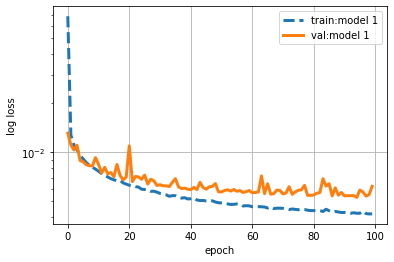

In [0]:
# TO SEE VALIDATION LOSS AND TRAINING LOSS
name1= "model 1"
hist = model1.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name1)
plt.plot(val_loss,linewidth=3,label="val:"+ name1)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

 **HANDLING TEST SET TO EVALUATE MODEL 1** 

In [0]:
# TO CONVERT IMAGE STRING ARRAY TO NUMPY ARRAY
test_data['Image'] = test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [0]:
# TO SEE COUNT OF DATA IN TEST SET
myprint = test_data.count()
myprint = myprint.reset_index()
print(myprint) 

     index     0
0  ImageId  1783
1    Image  1783


In [0]:
# TO DROP MISSING VALUES
test_data = test_data.dropna() 

In [0]:
# TO MAKE STACK OF NUMPY ARRAY
X_test = np.vstack(test_data['Image'].values) / 255.  # changes valeus between 0 and 1
X_test= X_test.astype(np.float32)  # TO CONVERT INTEGER TYPE INTO FLOAT TYPE

In [0]:
# TO PREDICT THE KEYPOINT FOR IMAGES OF TEST SET USING MODEL 1
y_pred1 = model_1.predict(X_test)

In [0]:
# FUNCTION TO PLOT IMAGES
def plot_sample(X,y,axs):
    '''
    kaggle picture is 96 by 96
    y is rescaled to range between -1 and 1
    '''
    
    axs.imshow(X.reshape(96,96),cmap="gray")
    axs.scatter(48*y[0::2]+ 48,48*y[1::2]+ 48)

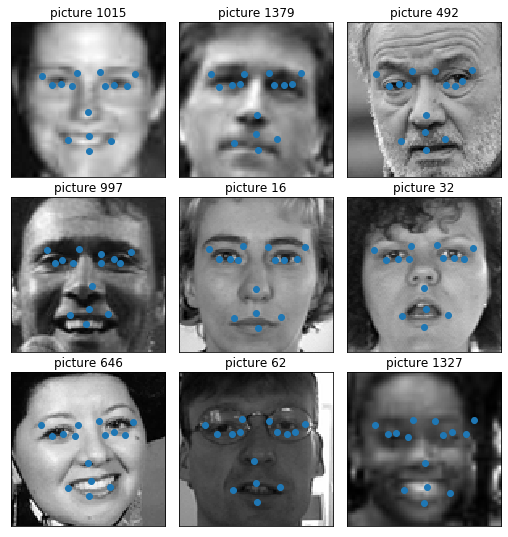

In [0]:
# TO PLOT THE IMAGES OF TEST SET PREDICTION
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X_test[ipic],y_pred1[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

# 4.2 Model 2: Covolutional neural network

In [0]:
# IMPORTING TRAINING DATASET AND REST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
# TO CONVERT IMAGE STRING TO NUMPY ARRAY AS DONE IN MODEL 1 
train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
myprint = train_data.count()
myprint = myprint.reset_index()
print("Before Dropping the missing values")
print(myprint)

Before Dropping the missing values
                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y

In [0]:
print("After dropping missing values")
train_data = train_data.dropna()
myprint = train_data.count()
myprint = myprint.reset_index()
print(myprint)
X = np.vstack(train_data['Image'].values) / 255.  # changes valeus between 0 and 1
X = X.astype(np.float32)
y = train_data[train_data.columns[:-1]].values
y = (y - 48) / 48  # y values are between [-1,1]
X, y = shuffle(X, y, random_state=42)  # shuffle data
y = y.astype(np.float32)
X= X.reshape(-1,96,96,1)
X.shape

After dropping missing values
                        index     0
0           left_eye_center_x  2140
1           left_eye_center_y  2140
2          right_eye_center_x  2140
3          right_eye_center_y  2140
4     left_eye_inner_corner_x  2140
5     left_eye_inner_corner_y  2140
6     left_eye_outer_corner_x  2140
7     left_eye_outer_corner_y  2140
8    right_eye_inner_corner_x  2140
9    right_eye_inner_corner_y  2140
10   right_eye_outer_corner_x  2140
11   right_eye_outer_corner_y  2140
12   left_eyebrow_inner_end_x  2140
13   left_eyebrow_inner_end_y  2140
14   left_eyebrow_outer_end_x  2140
15   left_eyebrow_outer_end_y  2140
16  right_eyebrow_inner_end_x  2140
17  right_eyebrow_inner_end_y  2140
18  right_eyebrow_outer_end_x  2140
19  right_eyebrow_outer_end_y  2140
20                 nose_tip_x  2140
21                 nose_tip_y  2140
22        mouth_left_corner_x  2140
23        mouth_left_corner_y  2140
24       mouth_right_corner_x  2140
25       mouth_right_corner_y  214

(2140, 96, 96, 1)

###  MODEL 2 ARCHITECTURE

In [0]:
model_2 = Sequential()
model_2.add(Conv2D(32,(3, 3), input_shape = (96, 96, 1)))
model_2.add(Activation('relu')) ## 96 - 3 + 2
model_2.add(MaxPooling2D(pool_size = (2,2))) ## 96 - (3-1)*2
    
        
model_2.add(Conv2D(64,(2,2)))
model_2.add(Activation('relu')) ## 
model_2.add(MaxPooling2D(pool_size = (2,2)))
     
    
model_2.add(Conv2D(128,(2,2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
     
        
model_2.add(Flatten())
    
model_2.add(Dense(500))
model_2.add(Activation('relu'))
     
        
model_2.add(Dense(500))
model_2.add(Activation('relu'))
     
model_2.add(Dense(30))
model_2.summary()    
sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
model_2.compile(loss="mean_squared_error",optimizer=sgd)
#      

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
activation_12 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)      

In [0]:
# TO CHECK WHICH DEVISE IS USING FOR TRAINING
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# TO SAVE THE CHECKOPOINTS WHEN TRAINNG THE MODEL
csv_logger = CSVLogger('Model_2_training.log',separator=',',append = False)

In [0]:
# TRAINING THE MODEL 2
model2 = model_2.fit(X,y,nb_epoch=1000,validation_split=0.2,verbose=True,callbacks=[csv_logger])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1712 samples, validate on 428 samples
Epoch 1/1000
1712/1712 [==============================] - 1s 613us/step - loss: 0.0479 - val_loss: 0.0064
Epoch 2/1000
1712/1712 [==============================] - 1s 313us/step - loss: 0.0062 - val_loss: 0.0057
Epoch 3/1000
1712/1712 [==============================] - 1s 327us/step - loss: 0.0057 - val_loss: 0.0053
Epoch 4/1000
1712/1712 [==============================] - 1s 316us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 5/1000
1712/1712 [==============================] - 1s 312us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 6/1000
1712/1712 [==============================] - 1s 319us/step - loss: 0.0049 - val_loss: 0.0047
Epoch 7/1000
1712/1712 [==============================] - 1s 316us/step - loss: 0.0048 - val_loss: 0.0046
Epoch 8/1000
1712/1712 [==============================] - 1s 319us/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/1000
1712/1712 [==============================] - 1s 312us/step - loss: 0.0046 - val_loss: 0.0045

In [0]:
# SAVING THE ARCHITECTURE OF MODEL 2
model_json = model_2.to_json()
with open("Model_2_architecture.json",'w') as json_file:
  json_file.write(model_json)

In [0]:
# TO SAVE THE WEIGHTS OF MODEL 2
model_2.save_weights('Model_2_weights.h5')

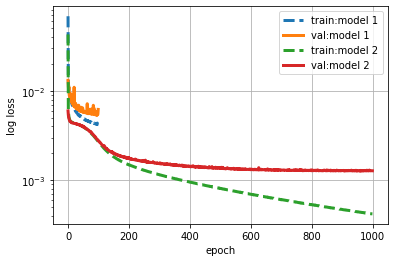

In [0]:
# TO COMPARE THE TRAING LOSS AND VALIDATION LOSS OF MODEL1 AND MODEL 2
name1= "model 1"
hist = model1.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name1)
plt.plot(val_loss,linewidth=3,label="val:"+name1)

name2= "model 2"
hist = model2.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name2)
plt.plot(val_loss,linewidth=3,label="val:"+name2)
plt.legend()

plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

OBSERVATION: Training as well as validation loss of model 1 is greater than model 2 which shows that model 2 is better than model 1 for face keypoint detection

In [0]:
# TO CHECK  MODEL 2 ON TRAINING SET
test_data['Image'] = test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
test_data = test_data.dropna() 
X_test = np.vstack(test_data['Image'].values) / 255.  # changes valeus between 0 and 1
X_test= X_test.astype(np.float32)

In [0]:
X_test1= X_test
X_test2 = X_test.reshape(-1,96,96,1)
y_pred2 = model_2.predict(X_test2)

In [0]:
X_test1.shape

(1783, 9216)

In [0]:
X_test2.shape

(1783, 96, 96, 1)

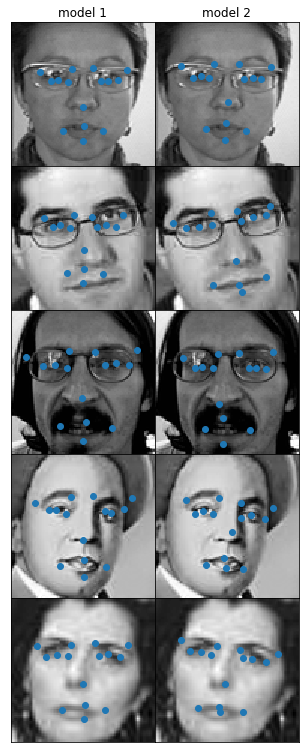

In [0]:
# TO COMPARE THE RESULTS OF MODEL 1 AND MODEL 2
fig = plt.figure(figsize=(4, 10))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test2.shape[0])
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])        
    plot_sample(X_test1[ipic],y_pred1[ipic],ax)
    if count < 3:
        ax.set_title("model 1")
        
    count += 1
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])  
    plot_sample(X_test2[ipic],y_pred2[ipic],ax)
    if count < 3:
        ax.set_title("model 2")
    count += 1
plt.show()

OBSERVATION : model 2 is predicting better face keypoint than model 1

# 4.3 Model 3 : CNN Model trained after flipping the images 

In [0]:
# IMPORTING TRAINING DATASET AND TEST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
# DATA PREPROCESSING
train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
myprint = train_data.count()
myprint = myprint.reset_index()
print("Before Dropping the missing values")
print(myprint)
print("After dropping missing values")
train_data = train_data.dropna()
myprint = train_data.count()
myprint = myprint.reset_index()
print(myprint)
X = np.vstack(train_data['Image'].values) / 255.  # changes valeus between 0 and 1
X = X.astype(np.float32)
y = train_data[train_data.columns[:-1]].values
y = (y - 48) / 48  # y values are between [-1,1]
X, y = shuffle(X, y, random_state=42)  # shuffle data
y = y.astype(np.float32)
X= X.reshape(-1,96,96,1)
X.shape

Before Dropping the missing values
                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y

(2140, 96, 96, 1)

In [0]:
# TO SPLIT THE DATASET INTO TRAAING SET AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1712, 96, 96, 1)


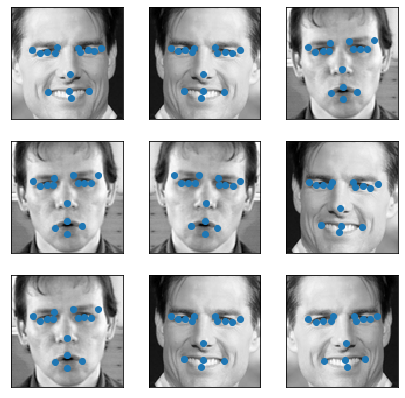

In [0]:
# TO GENERATE MORE IMAGES USING FLIP
generator = ImageDataGenerator()
modifier = FlipPic()

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = modifier.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

In [0]:
X.shape

(2140, 96, 96, 1)

In [0]:
# MODEL 3 ARCHITECTURE
model_3 = Sequential()
model_3.add(Conv2D(32,(3, 3), input_shape = (96, 96, 1)))
model_3.add(Activation('relu')) ## 96 - 3 + 2
model_3.add(MaxPooling2D(pool_size = (2,2))) ## 96 - (3-1)*2
    
        
model_3.add(Conv2D(64,(2,2)))
model_3.add(Activation('relu')) ## 
model_3.add(MaxPooling2D(pool_size = (2,2)))
     
    
model_3.add(Conv2D(128,(2,2)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
     
        
model_3.add(Flatten())
    
model_3.add(Dense(500))
model_3.add(Activation('relu'))
     
        
model_3.add(Dense(500))
model_3.add(Activation('relu'))
     
model_3.add(Dense(30))
model_3.summary()    
sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
model_3.compile(loss="mean_squared_error",optimizer=sgd)
     





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)  

we manually write fit function. Our fit function allows "Early stopping", which means that the back propagration algorithm will terminate if the validation loss does not decrease for conseqtive epochs

In [0]:
def fit(model,modifier,train,validation,
        batch_size=32,epochs=2000,print_every=10,patience=np.Inf):
 
    '''
    model :        keras model object
    Modifier:      DataModifier() object
    train:         tuple containing two numpy arrays (X_train,y_train)
    validation:    tuple containing two numpy arrays (X_val,y_val)
    patience:      The back propagation algorithm will stop if the val_loss does not decrease 
                   after  epochs
    '''
    
    ## manually write fit method
    X_train,y_train = train
    X_val, y_val    = validation
    
    generator = ImageDataGenerator()
    
    history = {"loss":[],"val_loss":[]}
    for e in range(epochs):
        if e % print_every == 0:
            print('Epoch {:4}:'.format(e)), 
        ## -------- ##
        ## training
        ## -------- ##
        batches = 0
        loss_epoch = []
        for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=batch_size):
            X_batch, y_batch = modifier.fit(X_batch, y_batch)
            hist = model.fit(X_batch, y_batch,verbose=False,epochs=1)
            loss_epoch.extend(hist.history["loss"])
            batches += 1
            if batches >= len(X_train) / batch_size:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break   
        loss = np.mean(loss_epoch)
        history["loss"].append(loss)
        ## --------- ##
        ## validation
        ## --------- ##
        y_pred = model.predict(X_val)
        val_loss = np.mean((y_pred - y_val)**2)
        history["val_loss"].append(val_loss)
        if e % print_every == 0:
            print("loss - {:6.5f}, val_loss - {:6.5f}".format(loss,val_loss))
        min_val_loss = np.min(history["val_loss"])
        ## Early stopping
        if patience is not np.Inf:
            if np.all(min_val_loss < np.array(history["val_loss"])[-patience:]):
                break
    return(history)

In [0]:
# TO FIT THE MODEL 3
model3 = fit(model_3,modifier,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=2000,print_every=100
           )

Epoch    0:








loss - 0.04450, val_loss - 0.00669
Epoch  100:
loss - 0.00296, val_loss - 0.00275
Epoch  200:
loss - 0.00171, val_loss - 0.00174
Epoch  300:
loss - 0.00138, val_loss - 0.00146
Epoch  400:
loss - 0.00119, val_loss - 0.00135
Epoch  500:
loss - 0.00106, val_loss - 0.00126
Epoch  600:
loss - 0.00096, val_loss - 0.00121
Epoch  700:
loss - 0.00087, val_loss - 0.00119
Epoch  800:
loss - 0.00079, val_loss - 0.00113
Epoch  900:
loss - 0.00073, val_loss - 0.00111
Epoch 1000:
loss - 0.00067, val_loss - 0.00109
Epoch 1100:
loss - 0.00063, val_loss - 0.00108
Epoch 1200:
loss - 0.00059, val_loss - 0.00108
Epoch 1300:
loss - 0.00054, val_loss - 0.00107
Epoch 1400:
loss - 0.00051, val_loss - 0.00107
Epoch 1500:
loss - 0.00048, val_loss - 0.00105
Epoch 1600:
loss - 0.00045, val_loss - 0.00106
Epoch 1700:
loss - 0.00042, val_loss - 0.00105
Epoch 1800:
loss - 0.00040, val_loss - 0.00105
Epoch 1900:
loss - 0.00038, val_loss - 0.00105


In [0]:
# TO SAVE ARCHITECTUE AND WEIGHTS OF MODEL 3
model_json = model_3.to_json()
with open("Model_3_architecture.json",'w') as json_file:
  json_file.write(model_json)
model_3.save_weights('Model_3_weights.h5')

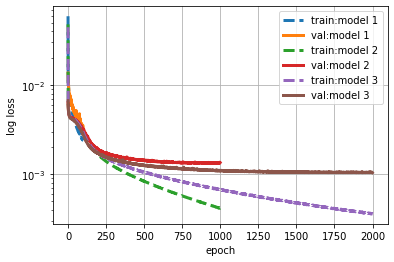

In [0]:
# TO COMPARE THE TRAINING LOSS AND VALIDATION LOSS OF ALL MODELS 
name1= "model 1"
hist = model1.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name1)
plt.plot(val_loss,linewidth=3,label="val:"+name1)

name2= "model 2"
hist = model2.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name2)
plt.plot(val_loss,linewidth=3,label="val:"+name2)

name3= "model 3"
loss = model3['loss']
val_loss = model3['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name3)
plt.plot(val_loss,linewidth=3,label="val:"+ name3)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

OBSERVATION : Validation loss of model 3 is lowest wgich shows that model 3 is beter than model 1 and model 2

In [0]:
# IMPORTING TRAINING DATASET AND REST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
# DATA PREPROCESSING
test_data['Image'] = test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
test_data = test_data.dropna() 
X_test = np.vstack(test_data['Image'].values) / 255.  # changes valeus between 0 and 1
X_test= X_test.astype(np.float32)
X_test1=X_test
X_test3 = X_test.reshape(-1,96,96,1)
y_pred3 = model_3.predict(X_test3)

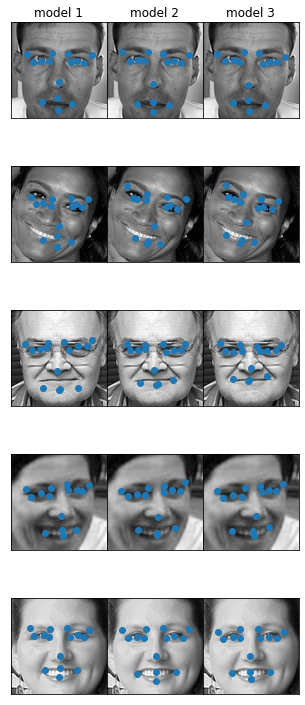

In [0]:
# TO COMPARE THE RESULTS OF MODEL1 MODEL 2 AND MODEL 3
fig = plt.figure(figsize=(4,10 ))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test.shape[0])
    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])        
    plot_sample(X_test1[ipic],y_pred1[ipic],ax)
    if count < 3:
        ax.set_title("model 1")
        
    count += 1
    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])  
    plot_sample(X_test[ipic],y_pred2[ipic],ax)
    if count < 3:
        ax.set_title("model 2")
    count += 1

    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])  
    plot_sample(X_test[ipic],y_pred3[ipic],ax)
    if count < 4:
        ax.set_title("model 3")
    count += 1

plt.show()

OBSERVATION: Model 3 is predicting better than model 1 and model 2

## 4.4 Model 4 : CNN trained after shifting and flipping the images 

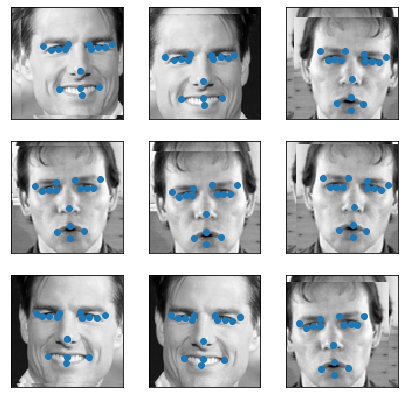

In [0]:
# TO GENERATE THE IMAGES AFTER SHIFTING AND FLIPPING THE IMAGES
generator = ImageDataGenerator()
shiftFlipPic = ShiftFlipPic(prop=0.1)

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = shiftFlipPic.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

In [0]:
# MODEL 4 ARCHITETURE
model_4 = Sequential()
model_4.add(Conv2D(32,(3, 3), input_shape = (96, 96, 1)))
model_4.add(Activation('relu')) ## 96 - 3 + 2
model_4.add(MaxPooling2D(pool_size = (2,2))) ## 96 - (3-1)*2
    
        
model_4.add(Conv2D(64,(2,2)))
model_4.add(Activation('relu')) ## 
model_4.add(MaxPooling2D(pool_size = (2,2)))
     
    
model_4.add(Conv2D(128,(2,2)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
     
        
model_4.add(Flatten())
    
model_4.add(Dense(500))
model_4.add(Activation('relu'))
     
        
model_4.add(Dense(500))
model_4.add(Activation('relu'))
     
model_4.add(Dense(30))
model_4.summary()    
sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
model_4.compile(loss="mean_squared_error",optimizer=sgd)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
activation_7 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)      

In [0]:
# TO FIT THE MODEL WITH TRAINING SET
model4 = fit(model_4,shiftFlipPic,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=3000,print_every=50,patience=100)

Epoch    0:
loss - 0.05475, val_loss - 0.00590
Epoch   50:
loss - 0.00453, val_loss - 0.00305
Epoch  100:
loss - 0.00329, val_loss - 0.00217
Epoch  150:
loss - 0.00271, val_loss - 0.00189
Epoch  200:
loss - 0.00258, val_loss - 0.00175
Epoch  250:
loss - 0.00228, val_loss - 0.00163
Epoch  300:
loss - 0.00218, val_loss - 0.00155
Epoch  350:
loss - 0.00205, val_loss - 0.00147
Epoch  400:
loss - 0.00188, val_loss - 0.00143
Epoch  450:
loss - 0.00179, val_loss - 0.00138
Epoch  500:
loss - 0.00178, val_loss - 0.00134
Epoch  550:
loss - 0.00175, val_loss - 0.00131
Epoch  600:
loss - 0.00165, val_loss - 0.00127
Epoch  650:
loss - 0.00156, val_loss - 0.00126
Epoch  700:
loss - 0.00149, val_loss - 0.00121
Epoch  750:
loss - 0.00147, val_loss - 0.00119
Epoch  800:
loss - 0.00145, val_loss - 0.00118
Epoch  850:
loss - 0.00139, val_loss - 0.00115
Epoch  900:
loss - 0.00138, val_loss - 0.00115
Epoch  950:
loss - 0.00137, val_loss - 0.00114
Epoch 1000:
loss - 0.00129, val_loss - 0.00110
Epoch 1050:
l

In [0]:
# TO SAVE THE ARCHITECTURE AND WEIGHTS FILE OF MODEL 4
model_json = model_4.to_json()
with open("Model_4_architecture.json",'w') as json_file:
  json_file.write(model_json)
model_4.save_weights('Model_4_weights.h5')

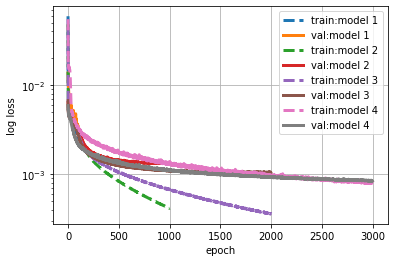

In [0]:
# TO COMPARE THE TRAINING LOSS AND VALIDATION LOSS OF ALL MODELS
name1= "model 1"
hist = model1.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name1)
plt.plot(val_loss,linewidth=3,label="val:"+name1)

name2= "model 2"
hist = model2.history
loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+name2)
plt.plot(val_loss,linewidth=3,label="val:"+name2)

name3= "model 3"
loss = model3['loss']
val_loss = model3['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name3)
plt.plot(val_loss,linewidth=3,label="val:"+ name3)

name4= "model 4"
loss = model4['loss']
val_loss = model4['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name4)
plt.plot(val_loss,linewidth=3,label="val:"+ name4)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

OBSERVATION : Validation loss of model 4 is lowest which shows model 4 is bettter then other models 

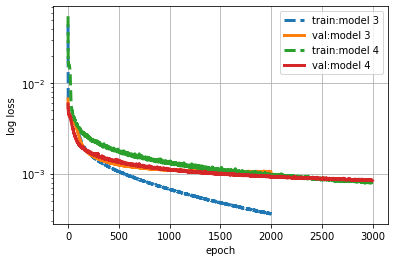

In [0]:
name3= "model 3"
loss = model3['loss']
val_loss = model3['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name3)
plt.plot(val_loss,linewidth=3,label="val:"+ name3)

name4= "model 4"
loss = model4['loss']
val_loss = model4['val_loss']
plt.plot(loss,"--",linewidth=3,label="train:"+ name4)
plt.plot(val_loss,linewidth=3,label="val:"+ name4)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

In [0]:
# IMPORTING TRAINING DATASET AND REST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
# IMPORTING TRAINING DATASET AND REST DATASET
train_data = pd.read_csv('/content/drive/My Drive/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
# DATA PREPROCESSING
test_data['Image'] = test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
test_data = test_data.dropna() 
X_test = np.vstack(test_data['Image'].values) / 255.  # changes valeus between 0 and 1
X_test= X_test.astype(np.float32)
X_test1 =X_test
X_test = X_test.reshape(-1,96,96,1)
y_pred1 = model_1.predict(X_test1)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)
y_pred4 = model_4.predict(X_test)

In [0]:
test_data['Image'] = test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
test_data = test_data.dropna() 
X_test = np.vstack(test_data['Image'].values) / 255.  # changes valeus between 0 and 1
X_test= X_test.astype(np.float32)
X_test1 =X_test
X_test = X_test.reshape(-1,96,96,1)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)
y_pred4 = model_4.predict(X_test)

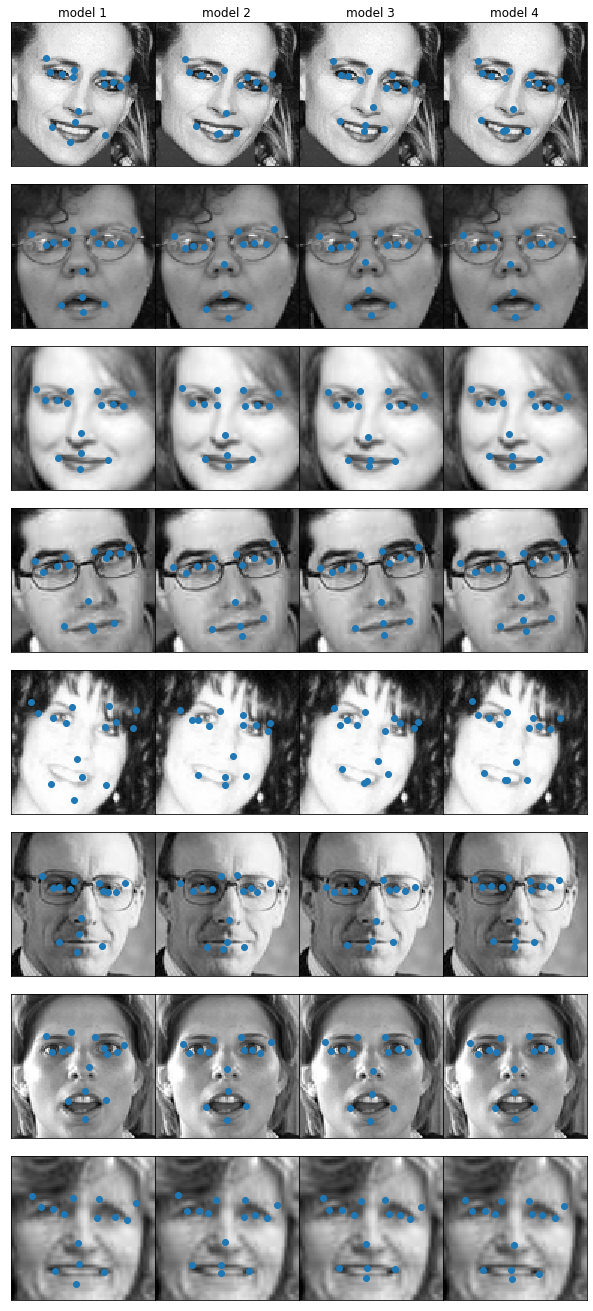

In [0]:
# TO COMPARE THE RESULTS OF ALL MODELS 
fig = plt.figure(figsize=(8,18 ))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 8
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test.shape[0])

    ax = fig.add_subplot(Npicture, 4, count,xticks=[],yticks=[])        
    plot_sample(X_test1[ipic],y_pred1[ipic],ax)
    if count < 3:
        ax.set_title("model 1")
        
    count += 1

    ax = fig.add_subplot(Npicture, 4, count,xticks=[],yticks=[])        
    plot_sample(X_test[ipic],y_pred2[ipic],ax)
    if count < 3:
        ax.set_title("model 2")
        
    count += 1
    ax = fig.add_subplot(Npicture, 4, count,xticks=[],yticks=[])  
    plot_sample(X_test[ipic],y_pred3[ipic],ax)
    if count < 4:
        ax.set_title("model 3")
    count += 1

    ax = fig.add_subplot(Npicture, 4, count,xticks=[],yticks=[])  
    plot_sample(X_test[ipic],y_pred4[ipic],ax)
    if count < 5:
        ax.set_title("model 4")
    count += 1

plt.show()

OBSERVATION : Model 4 is predicting keypoints better than other models.

# 5. Evaluation of models

##### Making csv file for submission in Kaggle

In [0]:
# TO READ CSV FILE
IdLookup = pd.read_csv('/content/drive/My Drive/IdLookupTable.csv')
training_data = pd.read_csv('/content/drive/My Drive/training.csv')

In [0]:
# TO TAKE COLUMNS WHICH WE HAVE TO SUBMIT
landmark_nm = IdLookup.columns[:-1].values

In [0]:
# TO CONVERT THE PREDICTED VALUES INTO DATAFRAME
df_y_pred1 = DataFrame(y_pred1,columns = landmark_nm)
df_y_pred2 = DataFrame(y_pred2,columns = landmark_nm)
df_y_pred3 = DataFrame(y_pred3,columns = landmark_nm)
df_y_pred4 = DataFrame(y_pred4,columns = landmark_nm)

In [0]:
# FUNCTION TO PREPARE SUBMISSION FILE
def prepare_submission(y_pred4,filename):
    '''
    save a .csv file that can be submitted to kaggle
    '''
    ImageId = IdLookup["ImageId"]
    FeatureName = IdLookup["FeatureName"]
    RowId = IdLookup["RowId"]
    
    submit = []
    for rowId,irow,landmark in zip(RowId,ImageId,FeatureName):
        submit.append([rowId,y_pred4[landmark].iloc[irow-1]])
    
    submit = DataFrame(submit,columns=["RowId","Location"])
    ## adjust the scale 
    submit["Location"] = submit["Location"]*48 + 48
    print(submit.shape)
     
    submit.to_csv(loc,index=False)

In [ ]:
# TO CALL FUNCTION TO PEPARE CSV FILE 
prepare_submission(df_y_pred1,"model1")
prepare_submission(df_y_pred2,"model2")
prepare_submission(df_y_pred3,"model3")
prepare_submission(df_y_pred4,"model4")

In [6]:
img = cv2.imread('model_2_evaluation.png')
cv2.imshow('Model 2 Eavluation Score',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img = cv2.imread('model_3_evaluation.png')
cv2.imshow('Model 3 Eavluation Score',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img = cv2.imread('model_4_evaluation.png')
cv2.imshow('Model 4 Eavluation Score',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 6. Results

### Score obtained in Root Mean Squared Error (RMSE)
Submissions are scored on the root mean squared error. RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors

 

- model 1 score 4.2145

- model 2 score 3.2624

- model 3 score 3.21571

- model 4 score 2.97368